In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('dataset/train.csv')
df.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pi

In [3]:
df=np.array(df)
m,n=df.shape
np.random.shuffle(df)

data=df[0:1000].T
y=data[0]
x=data[1:n]
x=x/255

data_train=df[1000:m].T
y_train=data_train[0]
x_train=data_train[1:n]
x_train=x_train/255
_,m_train=x_train.shape



In [4]:
x_train[:,0].shape

(784,)

In [5]:
def init_params():
    w1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    w2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return w1,b1,w2,b2
    
def ReLU(z):
    return np.maximum(z,0)

def softmax(z):
    a=np.exp(z)/sum(np.exp(z))
    return a

def forward_prop(w1,b1,w2,b2,x):
    z1=w1.dot(x)+b1
    a1=ReLU(z1)
    z2=w2.dot(a1)+b2
    a2=softmax(z2)
    return z1,a1,z2,a2

def ReLU_deriv(z):
    return z>0

def one_hot(y):
    one_hot_y=np.zeros((y.size,y.max()+1))
    one_hot_y[np.arange(y.size),y]=1
    one_hot_y=one_hot_y.T
    return one_hot_y

def backward_prop(z1,a1,z2,a2,w1,w2,x,y):
    one_hot_y=one_hot(y)
    dz2=a2-one_hot_y
    dw2=1/m*dz2.dot(a1.T)
    db2=1/m*np.sum(dz2)
    dz1=w2.T.dot(dz2)*ReLU_deriv(z1)
    dw1=1/m*dz1.dot(x.T)
    db1=1/m*np.sum(dz1)
    return dw1,db1,dw2,db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [6]:
def get_predictions(a2):
    return np.argmax(a2,0)

def get_accuracy(predictions,y):
    print(predictions, y)
    return np.sum(predictions==y)/y.size

def gradient_descent(x,y,alpha,iterations):
    w1,b1,w2,b2=init_params()
    for i in range(iterations):
        z1,a1,z2,a2=forward_prop(w1,b1,w2,b2,x)
        dw1,db1,dw2,db2=backward_prop(z1,a1,z2,a2,w1,w2,x,y)
        w1,b1,w2,b2=update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i%10==0:
            print("Iteration: ",i)
            predictions=get_predictions(a2)
            print(get_accuracy(predictions,y))
            
    return w1,b1,w2,b2

In [7]:
w1,b1,w2,b2=gradient_descent(x_train,y_train,0.10,500)

Iteration:  0
[1 5 1 ... 2 5 1] [3 6 4 ... 9 2 5]
0.08478048780487805
Iteration:  10
[6 5 4 ... 4 6 5] [3 6 4 ... 9 2 5]
0.16251219512195123
Iteration:  20
[6 6 4 ... 4 3 5] [3 6 4 ... 9 2 5]
0.22782926829268293
Iteration:  30
[6 6 4 ... 4 3 5] [3 6 4 ... 9 2 5]
0.30614634146341463
Iteration:  40
[6 6 4 ... 4 8 5] [3 6 4 ... 9 2 5]
0.36578048780487804
Iteration:  50
[6 6 4 ... 4 8 5] [3 6 4 ... 9 2 5]
0.42029268292682925
Iteration:  60
[5 6 4 ... 4 8 5] [3 6 4 ... 9 2 5]
0.4736341463414634
Iteration:  70
[5 2 4 ... 4 8 5] [3 6 4 ... 9 2 5]
0.5292682926829269
Iteration:  80
[3 2 4 ... 4 2 5] [3 6 4 ... 9 2 5]
0.5708292682926829
Iteration:  90
[3 2 4 ... 4 2 5] [3 6 4 ... 9 2 5]
0.6003170731707317
Iteration:  100
[3 2 4 ... 4 2 5] [3 6 4 ... 9 2 5]
0.6250243902439024
Iteration:  110
[3 2 4 ... 4 2 5] [3 6 4 ... 9 2 5]
0.6438048780487805
Iteration:  120
[3 2 4 ... 4 2 5] [3 6 4 ... 9 2 5]
0.6605853658536586
Iteration:  130
[3 2 4 ... 9 2 5] [3 6 4 ... 9 2 5]
0.6750975609756098
Iteration: 

In [8]:
def make_predictions(x,w1,b1,w2,b2):
    _,_,_,a2=forward_prop(w1,b1,w2,b2,x)
    predictions=get_predictions(a2)
    return predictions

def test_predictions(index,w1,b1,w2,b2):
    current_image=x_train[:,index,None]
    prediction=make_predictions(x_train[:,index,None],w1,b1,w2,b2)
    label=y_train[index]
    print("prediction:",prediction)
    print("Label:", label)
    current_image=current_image.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_image,interpolation='nearest')
    plt.show()

prediction: [5]
Label: 9


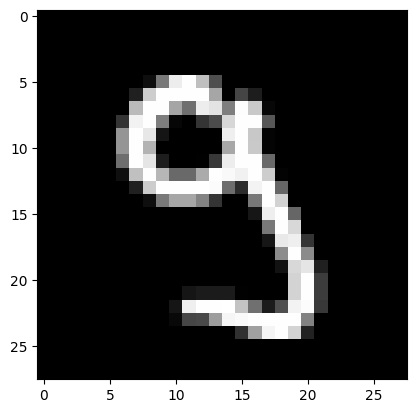

prediction: [8]
Label: 8


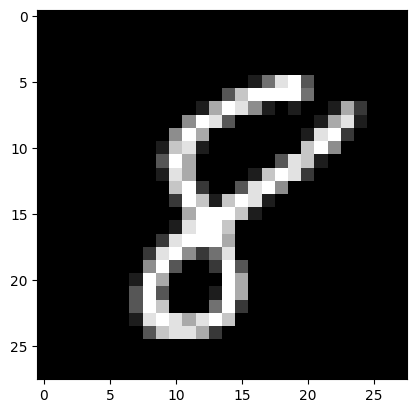

prediction: [2]
Label: 2


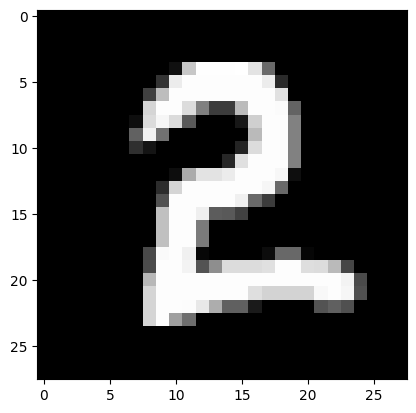

prediction: [2]
Label: 2


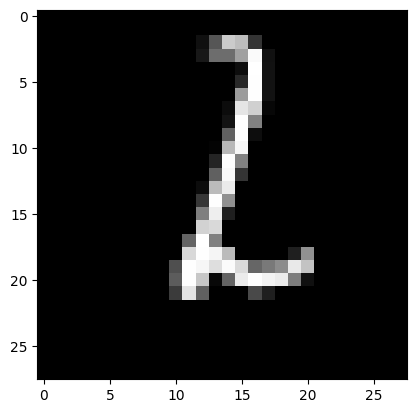

prediction: [0]
Label: 0


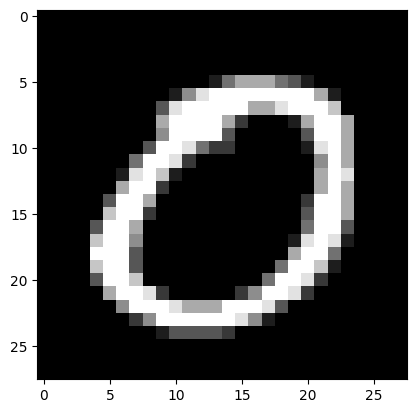

In [9]:
test_predictions(5,w1,b1,w2,b2)
test_predictions(13,w1,b1,w2,b2)
test_predictions(15,w1,b1,w2,b2)
test_predictions(27,w1,b1,w2,b2)
test_predictions(24,w1,b1,w2,b2)

In [10]:
dev_predictions=make_predictions(x,w1,b1,w2,b2)
get_accuracy(dev_predictions,y)

[3 3 0 6 5 8 7 9 6 0 7 0 3 9 2 0 4 7 1 8 9 5 7 8 1 4 0 0 1 4 3 2 7 7 2 9 3
 5 1 3 9 3 7 9 9 9 9 7 2 0 6 1 3 8 2 9 9 1 9 3 3 8 0 5 3 1 6 6 9 8 4 3 3 0
 0 9 8 1 2 6 3 7 7 0 9 1 9 3 5 5 2 5 0 9 1 7 5 4 4 5 8 8 7 6 4 8 5 7 0 6 6
 4 9 8 2 1 2 0 0 1 2 8 2 7 3 3 7 7 7 4 1 7 0 1 8 4 6 1 7 0 7 5 8 6 8 9 8 3
 7 0 8 8 7 1 1 5 3 9 8 6 6 6 2 5 6 4 0 6 8 2 3 8 6 2 7 4 6 6 3 1 4 0 6 2 3
 7 7 1 6 8 1 1 0 4 7 6 5 8 7 8 2 0 2 2 6 8 1 6 6 8 0 3 7 9 7 3 9 1 0 2 6 8
 3 8 7 0 4 7 3 3 4 2 4 2 6 7 0 1 5 5 9 8 3 0 5 7 6 4 9 5 8 8 1 6 7 4 8 6 8
 7 7 5 2 7 4 2 3 7 5 9 2 5 0 3 4 0 8 4 8 8 3 3 2 4 6 1 2 7 8 6 2 4 9 4 4 4
 5 7 9 5 7 6 3 9 9 6 4 2 4 3 6 6 5 0 8 1 9 9 6 5 8 9 0 1 2 1 8 4 7 3 4 3 3
 8 0 7 3 4 3 4 9 4 6 8 5 4 4 5 0 5 6 1 6 5 7 2 7 4 8 3 7 9 6 9 2 2 8 9 7 9
 0 8 2 7 2 0 5 3 2 3 4 6 6 9 0 2 6 4 1 9 5 9 1 7 8 6 7 8 0 6 9 4 2 6 0 6 6
 1 5 9 0 7 9 5 4 2 5 4 4 0 9 8 0 2 5 9 8 7 3 1 3 7 5 9 0 1 8 8 0 9 3 3 5 1
 7 2 1 7 1 6 6 4 0 8 1 4 3 1 2 1 3 1 1 1 3 1 9 9 3 0 8 5 8 2 7 6 7 5 9 0 9
 9 9 2 3 3 6 1 1 4 1 8 3 

np.float64(0.838)

In [ ]:
#approx 84% accuracy